In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import json
import os

# BioFINDER Sub-Dataset
This notebook aims to extract the dataset of interested from BF-2 (IDs extraction and visualisation of the dataset paremeter). 

## Useful Fonctions

In [2]:

def get_sub_disease(df) : 
    """
    Extract sub-DataFrame based on the Disease. 
    Input : 
    -------
        - df [DataFrame] :  should have a 'dx' column. 
    """

    if 'dx' not in df.columns:
            print(f"Error: Column dx is missing from the DataFrame.")
            return
    
    AD = df[df['dx']=="AD"]
    MCI = df[df['dx']=="MCI"]
    SCD =df[df['dx']=="SCD"]
    normal =df[df['dx']=="Normal"]
    print(f" Numer of AD : {len(AD)} \n Number of MCI : {len(MCI)}\n Number of SCD: {len(SCD)} \n Numer of Normal : {len(normal)}")
    return AD, MCI, SCD, normal

def get_info(df) :
    """
    Extract relevant metric from the dataset
    Input : 
    --------
        - df [DataFrame] : should have a 'gender', 'age' and 'tauPET' column. 
    """
    required_columns = ['gender', 'age', 'tauPET']
    
    for col in required_columns:
        if col not in df.columns:
            print(f"Error: Column '{col}' is missing from the DataFrame.")
            return
    
    print(f"Number of women : {len(df[df.gender=='woman'])}")
    print(f"Number of men : {len(df[df.gender=='man'])}")
    print(f"Averaged age {df.age.mean()} +/- {df.age.std()}")
    print(f"Averaged tau {df.tauPET.mean()} +/- {df.tauPET.std()}")

def plot_age_dist(df, name_save, hue_col=None,bins=15, ylim=[0,30], xlim=[50,93]): 
    """
    Plot the distribution of age from the dataframe. 
    Input : 
    --------
        - df [DataFrame] : should have a 'age' column. 
        - name_save [str] : directory and name to save the resulting plot. 
        - hue_col [str] : if given, plot distrbtion of age for each categories defined by hue. 
        - bin [int] : number of bins for the histogram. 
        - y_lim/x_lim [arr] : definition of the y-axis limit. 
    """

    g=sns.displot(df, x='age', col=hue_col, color = 'cadetblue', bins=bins, alpha=0.9)

    # Axis set-up
    for ax in g.axes.flat:
        ax.set_xlabel('Age', fontsize=18)
        ax.set_ylabel('Count', fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=16)
        y_ticks = list(range(ylim[0], ylim[1] + 1, (ylim[1] - ylim[0]) // 5))
        if ylim[1] not in y_ticks:
            y_ticks.append(ylim[1])
        ax.set_yticks(y_ticks)
    
    plt.tight_layout()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.savefig(name_save)  

## Group Extraction
### Extract .txt file with the ID for the different group from the BF2_1365.txt file

In [3]:
# Read file, drops nan and younger subject
df=pd.read_csv("data/BF2_1365.txt", sep="\t")
df.dropna(inplace=True)
df=df[df.age>=50]
AD, MCI, SCD, norm=get_sub_disease(df)
print(f"Total number of subject {len(df)}")

 Numer of AD : 217 
 Number of MCI : 319
 Number of SCD: 220 
 Numer of Normal : 436
Total number of subject 1192


#### Tau Negatif group (< 1.36)

In [4]:
nom_neg_tau=norm[norm['tauPET']<=1.36]

# Amyloid neg
nom_neg_tau_am_neg=nom_neg_tau[nom_neg_tau['abnormalAmyloidCSF']==0.0]

#Amyloid pos
nom_neg_tau_am_pos=nom_neg_tau[nom_neg_tau['abnormalAmyloidCSF']==1.0]

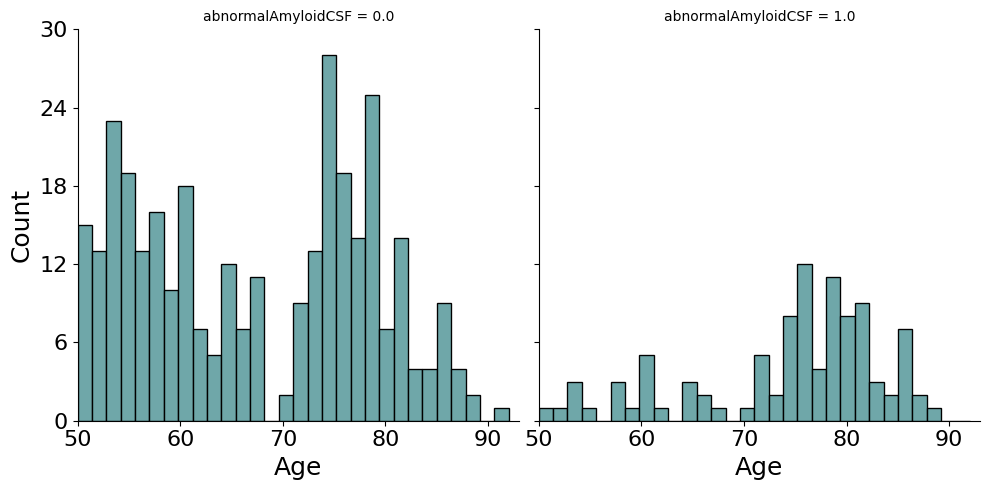

In [5]:
# Plot age distribution 
plot_age_dist(nom_neg_tau,"plot/Dataset/normal_tau_neg.png" ,  'abnormalAmyloidCSF',bins=30)

Note  :  We can see that the first group (A-, T-) is way much bigger than the other one, so let´s only take a subsample (100) of it with equal repartition of gender

In [6]:
nom_neg_tau_am_neg=nom_neg_tau_am_neg.groupby('gender').sample(n=50, random_state=1).reset_index()
get_info(nom_neg_tau_am_neg)
get_info(nom_neg_tau_am_pos)

Number of women : 50
Number of men : 50
Averaged age 67.15 +/- 10.82307206336948
Averaged tau 1.1305 +/- 0.08549765192593584
Number of women : 52
Number of men : 45
Averaged age 74.3298969072165 +/- 9.255315645486894
Averaged tau 1.1810309278350515 +/- 0.08114396332140275


### Tau-positive  group (> 1.36) 

In [7]:
tau = df[df['tauPET']> 1.36]
AD_tau, MCI_tau, SCD_tau, nom_tau=get_sub_disease(tau)

 Numer of AD : 192 
 Number of MCI : 99
 Number of SCD: 23 
 Numer of Normal : 15


### Amyloid positive (value of 1) and Tau Positive (> 1.36)

In [8]:
final=tau[tau['abnormalAmyloidCSF']==1.0]
AD_final, MCI_final, SCD_final, norm_final=get_sub_disease(final)
get_info(norm_final)

 Numer of AD : 192 
 Number of MCI : 98
 Number of SCD: 23 
 Numer of Normal : 12
Number of women : 10
Number of men : 2
Averaged age 77.0 +/- 7.185844671043456
Averaged tau 1.5841666666666667 +/- 0.2802420490586772


In [9]:
print("AD group")
get_info(AD_final)
print("\n MCI group")
get_info(MCI_final)      
print("\n SCD")
get_info(SCD_final)
print("\n normal")
get_info(norm_final)

AD group
Number of women : 111
Number of men : 81
Averaged age 71.99479166666667 +/- 7.4745623737368785
Averaged tau 2.2501041666666666 +/- 0.6199265195295777

 MCI group
Number of women : 43
Number of men : 55
Averaged age 71.5204081632653 +/- 7.274060100600571
Averaged tau 1.8133673469387757 +/- 0.4017742708237817

 SCD
Number of women : 12
Number of men : 11
Averaged age 71.6086956521739 +/- 5.944738930232058
Averaged tau 1.7626086956521736 +/- 0.4054763460347297

 normal
Number of women : 10
Number of men : 2
Averaged age 77.0 +/- 7.185844671043456
Averaged tau 1.5841666666666667 +/- 0.2802420490586772


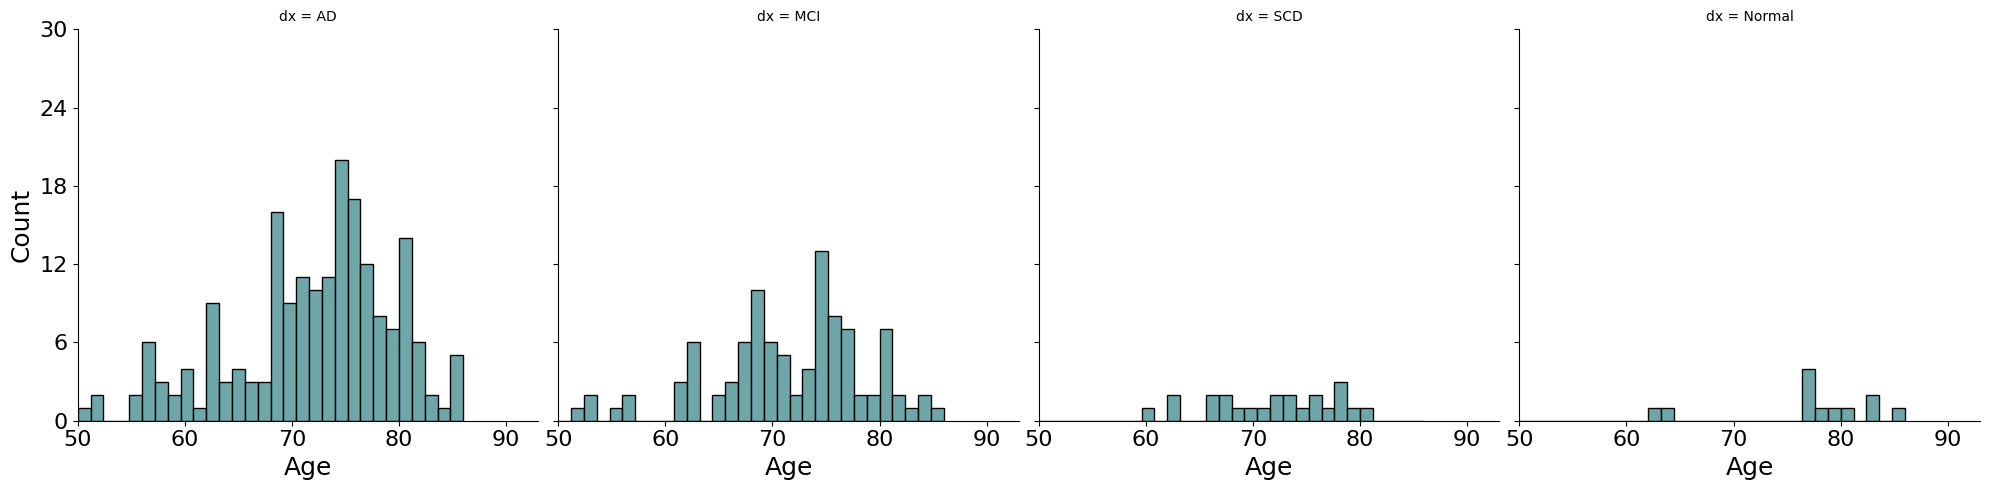

In [10]:
plot_age_dist(final,  'plot/Dataset/second_group.png', 'dx', bins=30)

# Verify Groups extraction 
We extracted the geometric eigenmodes from the white surfaces of the selected subject above. Since some subject surfaces might not be available, let’s see how many of them were extracted and what the final dataset looks like.

In [ ]:
def get_non_empty_subject_ids(base_path):
   
    non_empty_subject_ids = []

    # Walk through the base directory
    for subject_id in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject_id)
        if os.path.isdir(subject_path):
            modes_path = os.path.join(subject_path, '200_modes')
            # Check if the 2000_modes directory exists and is not empty
            if os.path.exists(modes_path) and os.path.isdir(modes_path) and os.listdir(modes_path):
                non_empty_subject_ids.append(int(subject_id))

    return non_empty_subject_ids

base_directory_path = 'results_new/'
non_empty_subject_ids = get_non_empty_subject_ids(base_directory_path)


FileNotFoundError: [Errno 2] No such file or directory: 'results_new/'

In [ ]:
np.savetxt("data/final_id.txt", non_empty_subject_ids, fmt='%d', delimiter= " ")

In [ ]:
# Check for AD 
AD_ID_final = [int(x) for x in non_empty_subject_ids if int(x) in AD_final.ID.values]
MCI_ID_final = [int(x) for x in non_empty_subject_ids if int(x) in MCI_final.ID.values]
Healthy_all_neg=[int(x) for x in non_empty_subject_ids if int(x) in nom_neg_tau_am_neg.ID.values]
Healthy_a_pos=[int(x) for x in non_empty_subject_ids if int(x) in nom_neg_tau_am_pos.ID.values]

In [ ]:
#Final selection based on available data on the server (surf output + Tau-Pet). 
AD_final_bis = AD_final[AD_final['ID'].isin(AD_ID_final)]
AD_final_bis = AD_final_bis[AD_final_bis['ID'] != 1409]
AD_final_bis = AD_final_bis[AD_final_bis['ID'] != 1470]
AD_final_bis = AD_final_bis[AD_final_bis['ID'] != 1574]
AD_final_bis = AD_final_bis[AD_final_bis['ID'] != 1123]

MCI_final_bis = MCI_final[MCI_final['ID'].isin(MCI_ID_final)]
group_un = nom_neg_tau_am_neg[nom_neg_tau_am_neg['ID'].isin(Healthy_all_neg)]
group_un=group_un[group_un['ID'] != 1790]
group_un=group_un[group_un['ID'] != 1744]
group_deux=nom_neg_tau_am_pos[nom_neg_tau_am_pos['ID'].isin(Healthy_a_pos)]

In [ ]:
print("Group 1")
get_info(group_un)
print("\n Group 2 ")

get_info(group_deux)      
print("\n MCI")
get_info(MCI_final_bis)

print("\n AD")
get_info(AD_final_bis)

Group 1
Number of women : 43
Number of men : 45
Averaged age 66.38636363636364 +/- 10.804885887350338
Averaged tau 1.1278409090909092 +/- 0.08691981856247841

 Group 2 
Number of women : 50
Number of men : 44
Averaged age 74.11702127659575 +/- 9.23627302643752
Averaged tau 1.1805319148936169 +/- 0.08233640699425657

 MCI
Number of women : 40
Number of men : 53
Averaged age 71.41935483870968 +/- 7.286560858488731
Averaged tau 1.8113978494623657 +/- 0.40794711773082815

 AD
Number of women : 99
Number of men : 73
Averaged age 72.1453488372093 +/- 7.527480368377883
Averaged tau 2.2027906976744185 +/- 0.5749236433670426


In [ ]:
def save_txt(data, file) : 

    data_string = ', '.join(map(str, data))
    with open(file, "w") as f:
        f.write(data_string)


In [ ]:
save_txt(AD_final_bis.ID.values.astype(int),"data/AD.txt" )
save_txt(MCI_final_bis.ID.values.astype(int),"data/MCI.txt" )
save_txt(group_un.ID.values.astype(int),"data/group_un.txt" )
save_txt(group_deux.ID.values.astype(int),"data/group_deux.txt" )

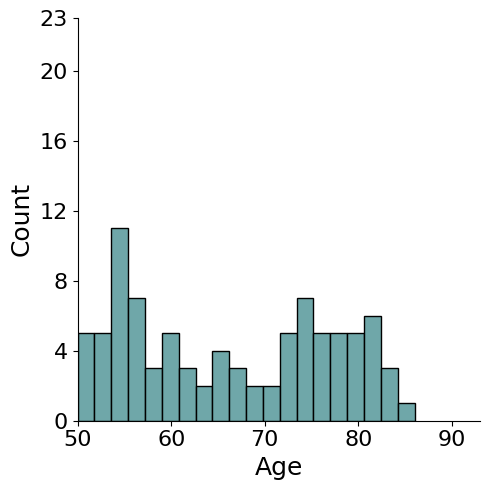

In [ ]:
plot_age_dist(group_un, "plot/Dataset/gorup1.png", bins=20, ylim=[0,23])

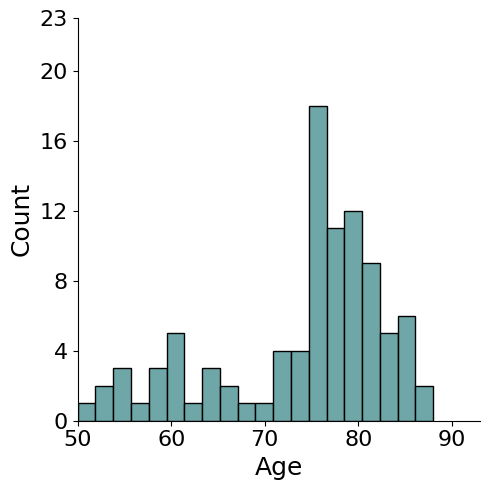

In [ ]:
plot_age_dist(group_deux, "plot/Dataset/Final_group2.png", bins=20, ylim=[0,23])

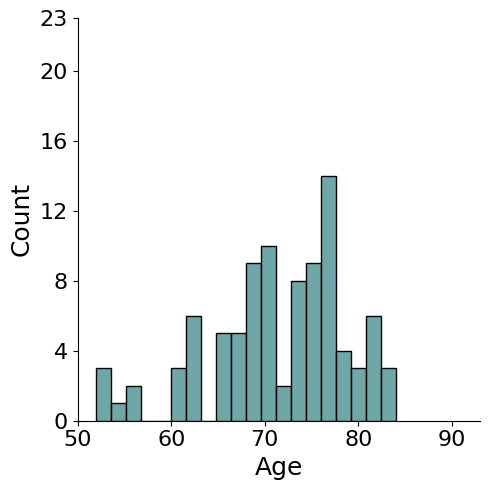

In [ ]:
plot_age_dist(MCI_final_bis, "plot/Dataset/MCI.png", bins=20, ylim=[0,23])

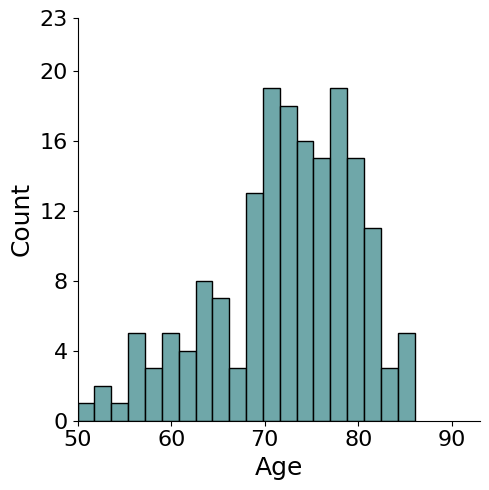

In [ ]:
plot_age_dist(AD_final_bis, "plot/Dataset/AD.png", bins=20, ylim=[0,23])